## Original Dataset Head:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.768094  -1.062899  -1.502895        0.0        0.0        0.0   
1  -1.326407  -0.725706  -1.436839        0.0        0.0        0.0   
2  -0.870501  -0.944614  -0.796163        0.0        0.0        0.0   
3  -1.198228  -0.633996  -1.031985        0.0        0.0        0.0   
4  -0.581253  -0.839979  -0.762256        0.0        0.0        0.0   

   feature_6  feature_7  feature_8  feature_9  
0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0  

## Data scaled using StandardScaler.

--- K-Means Clustering Analysis ---
Evaluating K-Means for k in [2, 3, 4, 5, 6, 7, 8, 9, 10]
K-Means (k=2): Silhouette=0.523, Davies-Bouldin=0.721
K-Means (k=3): Silhouette=0.366, Davies-Bouldin=1.283
K-Means (k=4): Silh

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

K-Means (k=5): Silhouette=0.429, Davies-Bouldin=0.727
K-Means (k=6): Silhouette=0.378, Davies-Bouldin=0.686
K-Means (k=7): Silhouette=0.344, Davies-Bouldin=1.115
K-Means (k=8): Silhouette=0.478, Davies-Bouldin=0.677
K-Means (k=9): Silhouette=0.473, Davies-Bouldin=0.673
K-Means (k=10): Silhouette=0.511, Davies-Bouldin=0.631


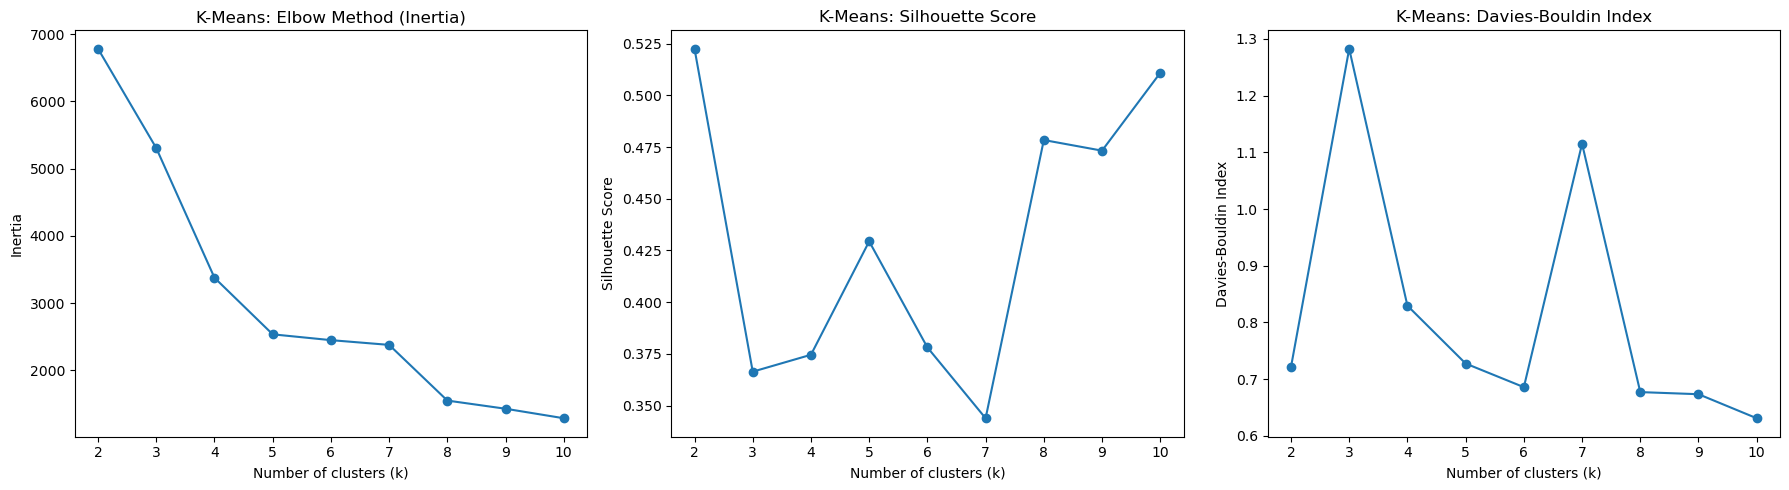


--- Hierarchical Clustering Analysis ---
Generating Dendrogram (using 'ward' linkage)...
Dataset large, using a sample of 500 for dendrogram.


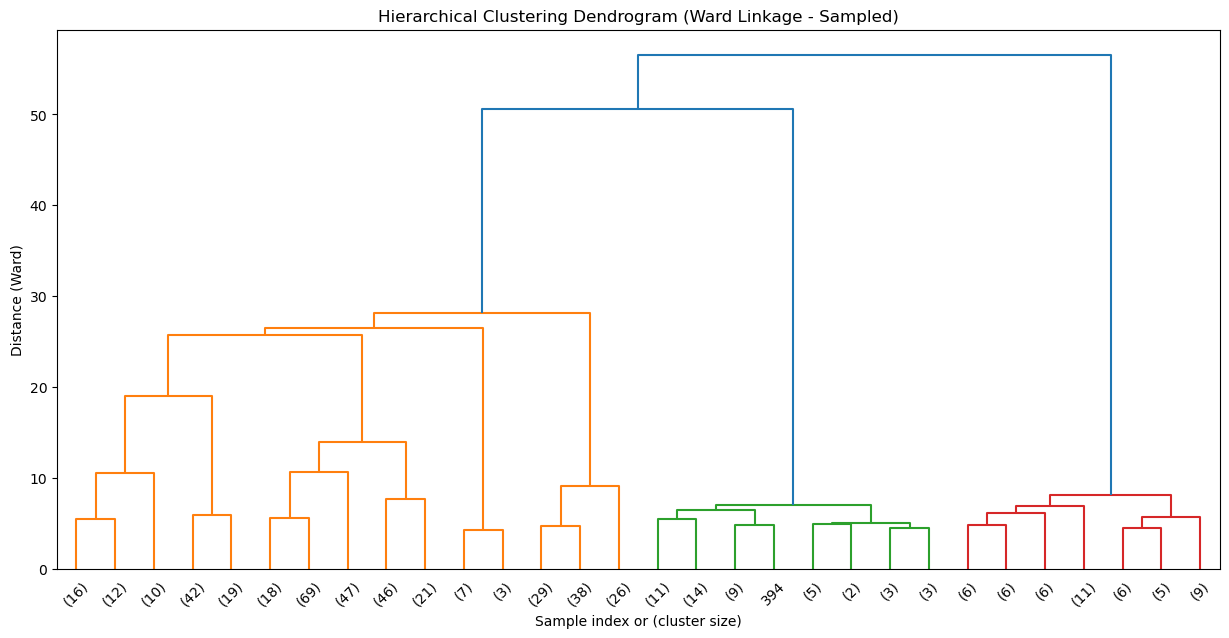


Evaluating Hierarchical Clustering with 'ward' linkage:
N_clusters=2: Silhouette=0.523, Davies-Bouldin=0.721
N_clusters=3: Silhouette=0.566, Davies-Bouldin=0.708
N_clusters=4: Silhouette=0.567, Davies-Bouldin=0.655
N_clusters=5: Silhouette=0.428, Davies-Bouldin=0.722
N_clusters=6: Silhouette=0.504, Davies-Bouldin=0.733
N_clusters=7: Silhouette=0.518, Davies-Bouldin=0.624
N_clusters=8: Silhouette=0.522, Davies-Bouldin=0.686
N_clusters=9: Silhouette=0.563, Davies-Bouldin=0.592
N_clusters=10: Silhouette=0.558, Davies-Bouldin=0.582

Evaluating Hierarchical Clustering with 'complete' linkage:
N_clusters=2: Silhouette=0.504, Davies-Bouldin=1.049
N_clusters=3: Silhouette=0.496, Davies-Bouldin=0.684
N_clusters=4: Silhouette=0.567, Davies-Bouldin=0.655
N_clusters=5: Silhouette=0.531, Davies-Bouldin=1.201
N_clusters=6: Silhouette=0.250, Davies-Bouldin=1.530
N_clusters=7: Silhouette=0.245, Davies-Bouldin=1.371
N_clusters=8: Silhouette=0.237, Davies-Bouldin=1.576
N_clusters=9: Silhouette=0.193, D

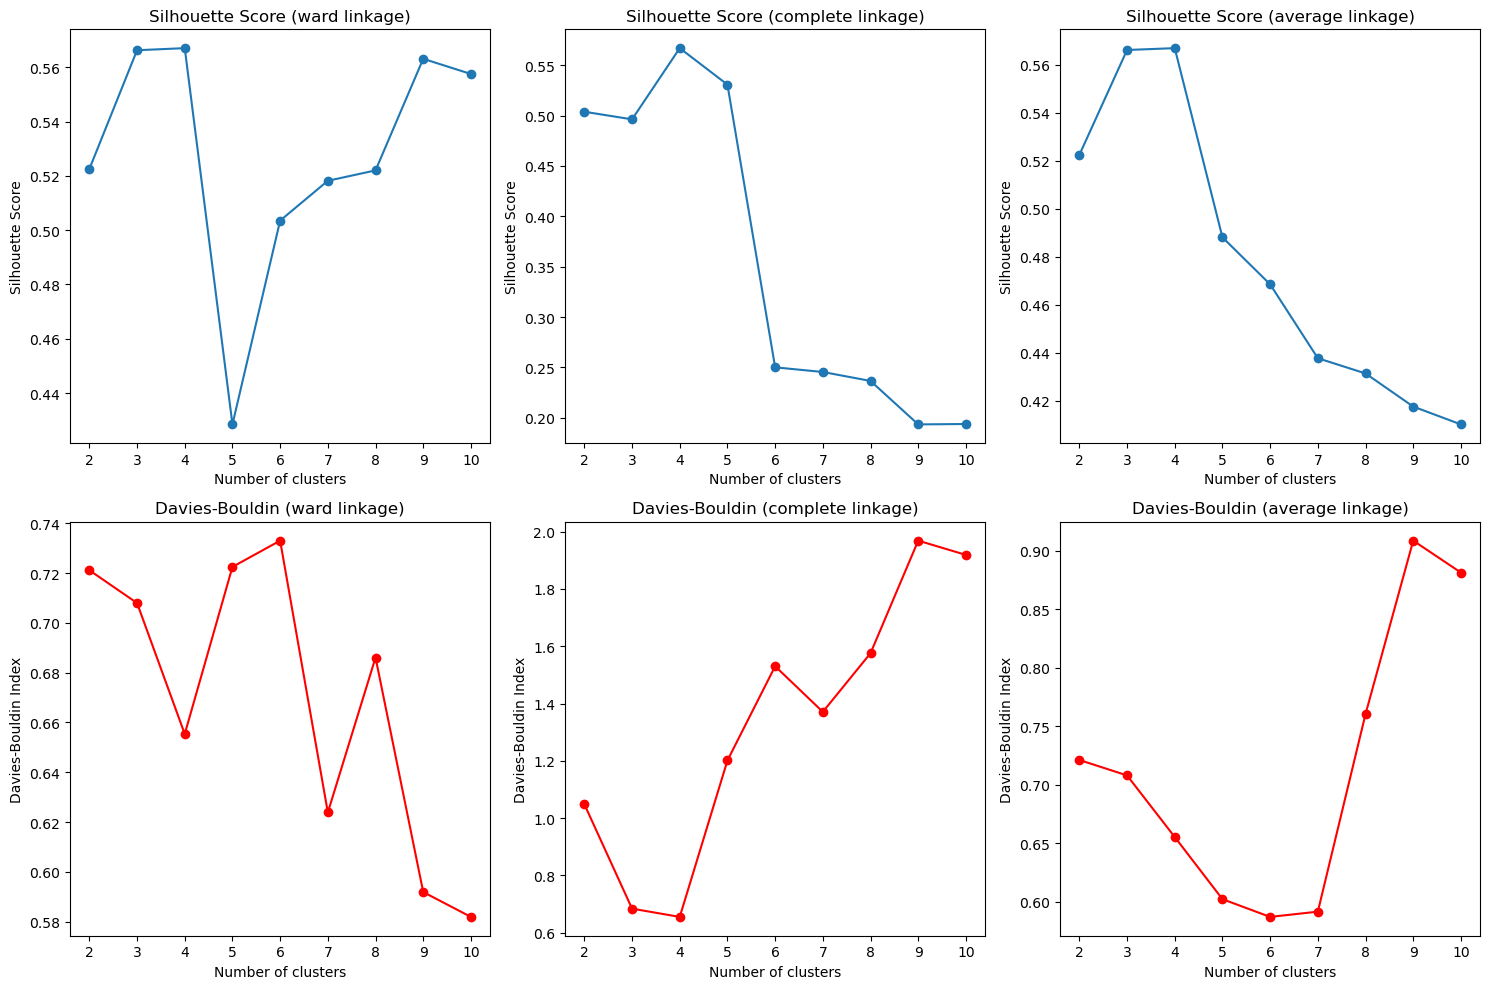


--- DBSCAN Clustering Analysis ---
Using min_samples = 20 for DBSCAN eps estimation.
Calculating k-distances for eps estimation...


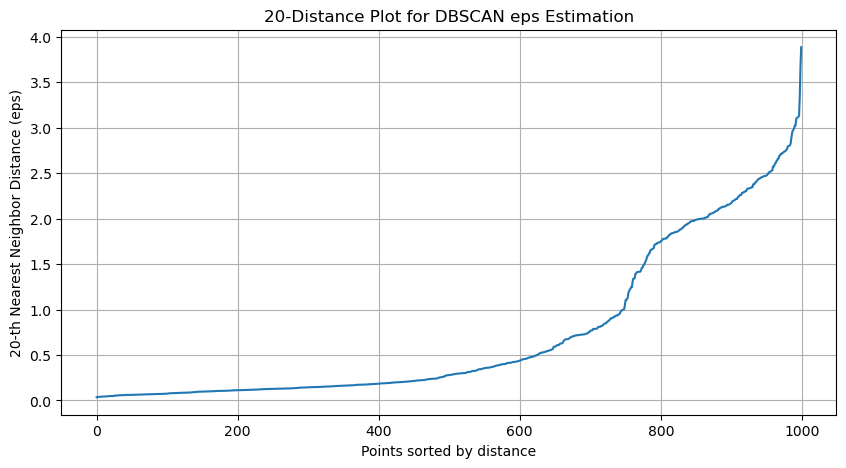

Examine the k-distance plot to find an 'elbow' point for eps.
You might need to adjust the range of eps values to test based on this plot.

DBSCAN (eps=0.5, min_samples=20):
  Estimated number of clusters: 5
  Estimated number of noise points: 316 (31.60%)
  Silhouette Score (on non-noise): 0.613
  Davies-Bouldin Index (on non-noise): 0.513

DBSCAN (eps=1.0, min_samples=20):
  Estimated number of clusters: 4
  Estimated number of noise points: 236 (23.60%)
  Silhouette Score (on non-noise): 0.477
  Davies-Bouldin Index (on non-noise): 0.945

DBSCAN (eps=1.5, min_samples=20):
  Estimated number of clusters: 3
  Estimated number of noise points: 205 (20.50%)
  Silhouette Score (on non-noise): 0.406
  Davies-Bouldin Index (on non-noise): 0.770

DBSCAN (eps=2.0, min_samples=20):
  Estimated number of clusters: 3
  Estimated number of noise points: 27 (2.70%)
  Silhouette Score (on non-noise): 0.570
  Davies-Bouldin Index (on non-noise): 0.683

DBSCAN (eps=2.5, min_samples=20):
  Estimated 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
try:
    df_raw = pd.read_csv('challenge.txt', sep='\t', header=None)
    # Assign generic column names
    df_raw.columns = [f'feature_{i}' for i in range(df_raw.shape[1])]
except FileNotFoundError:
    print("Error: 'challenge.txt' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

print("## Original Dataset Head:")
print(df_raw.head())

# --- Data Preprocessing: Scaling ---
# It's crucial to scale data for distance-based clustering algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_raw)
print("\n## Data scaled using StandardScaler.")

# --- K-Means Clustering ---
print("\n--- K-Means Clustering Analysis ---")
k_range = range(2, 11)  # Test a range of k values
kmeans_silhouette_scores = []
kmeans_davies_bouldin_scores = []
inertia_list = []

print("Evaluating K-Means for k in", list(k_range))
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    
    inertia_list.append(kmeans.inertia_)
    
    # Avoid scoring if only one cluster is formed or all points are in one cluster (edge cases)
    if len(np.unique(labels)) > 1:
        silhouette = silhouette_score(X_scaled, labels)
        davies_bouldin = davies_bouldin_score(X_scaled, labels)
        kmeans_silhouette_scores.append(silhouette)
        kmeans_davies_bouldin_scores.append(davies_bouldin)
        print(f"K-Means (k={k}): Silhouette={silhouette:.3f}, Davies-Bouldin={davies_bouldin:.3f}")
    else:
        kmeans_silhouette_scores.append(np.nan) # Or some other indicator like -1 or 0
        kmeans_davies_bouldin_scores.append(np.nan)
        print(f"K-Means (k={k}): Not enough distinct clusters to calculate metrics.")

# Plotting K-Means evaluation metrics (Elbow method for inertia)
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia_list, marker='o')
plt.title('K-Means: Elbow Method (Inertia)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(k_range, kmeans_silhouette_scores, marker='o')
plt.title('K-Means: Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(k_range, kmeans_davies_bouldin_scores, marker='o')
plt.title('K-Means: Davies-Bouldin Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.tight_layout()
plt.show()

# --- Hierarchical Clustering ---
print("\n--- Hierarchical Clustering Analysis ---")
# Dendrogram to help choose the number of clusters (optional, can be slow for many samples)
# Let's use a subset for dendrogram if dataset is large, or skip if too slow
# For now, we'll try a few cluster numbers directly
print("Generating Dendrogram (using 'ward' linkage)...")
# Using a sample if the dataset is too large, otherwise, it might be very slow
sample_size_for_dendrogram = min(500, X_scaled.shape[0])
if X_scaled.shape[0] > sample_size_for_dendrogram:
    print(f"Dataset large, using a sample of {sample_size_for_dendrogram} for dendrogram.")
    indices = np.random.choice(X_scaled.shape[0], sample_size_for_dendrogram, replace=False)
    X_sample_dendro = X_scaled[indices]
else:
    X_sample_dendro = X_scaled

linked = linkage(X_sample_dendro, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp', # Show only the last p merged clusters
           p=30) # Number of last p merged clusters to show
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage - Sampled)')
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance (Ward)")
plt.show()


n_clusters_hierarchical_range = range(2, 11) # Same range as K-Means for comparison
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

linkage_methods = ['ward', 'complete', 'average'] # Common linkage methods

for method in linkage_methods:
    hierarchical_silhouette_scores[method] = []
    hierarchical_davies_bouldin_scores[method] = []
    print(f"\nEvaluating Hierarchical Clustering with '{method}' linkage:")
    for n_clusters in n_clusters_hierarchical_range:
        # Ward linkage only works with euclidean affinity
        if method == 'ward':
            agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=method)
        else:
            # For other methods, you can specify affinity, default is 'euclidean'
            agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
            
        labels = agg_clustering.fit_predict(X_scaled)
        
        if len(np.unique(labels)) > 1:
            silhouette = silhouette_score(X_scaled, labels)
            davies_bouldin = davies_bouldin_score(X_scaled, labels)
            hierarchical_silhouette_scores[method].append(silhouette)
            hierarchical_davies_bouldin_scores[method].append(davies_bouldin)
            print(f"N_clusters={n_clusters}: Silhouette={silhouette:.3f}, Davies-Bouldin={davies_bouldin:.3f}")
        else:
            hierarchical_silhouette_scores[method].append(np.nan)
            hierarchical_davies_bouldin_scores[method].append(np.nan)
            print(f"N_clusters={n_clusters}: Not enough distinct clusters to calculate metrics.")

# Plotting Hierarchical Clustering evaluation metrics
plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, len(linkage_methods), i + 1)
    plt.plot(n_clusters_hierarchical_range, hierarchical_silhouette_scores[method], marker='o')
    plt.title(f'Silhouette Score ({method} linkage)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

    plt.subplot(2, len(linkage_methods), i + 1 + len(linkage_methods))
    plt.plot(n_clusters_hierarchical_range, hierarchical_davies_bouldin_scores[method], marker='o', color='r')
    plt.title(f'Davies-Bouldin ({method} linkage)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Davies-Bouldin Index')
plt.tight_layout()
plt.show()

# --- DBSCAN Clustering ---
print("\n--- DBSCAN Clustering Analysis ---")
# Estimating eps using k-distance plot
# min_samples is often chosen as 2*dim or based on domain knowledge. Let's start with 2*num_features.
n_features = X_scaled.shape[1]
min_samples_dbscan = 2 * n_features
print(f"Using min_samples = {min_samples_dbscan} for DBSCAN eps estimation.")

print("Calculating k-distances for eps estimation...")
neighbors = NearestNeighbors(n_neighbors=min_samples_dbscan)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances to the k-th (min_samples_dbscan-th) nearest neighbor
k_distances = np.sort(distances[:, min_samples_dbscan-1], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.title(f'{min_samples_dbscan}-Distance Plot for DBSCAN eps Estimation')
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples_dbscan}-th Nearest Neighbor Distance (eps)")
plt.grid(True)
plt.show()
print("Examine the k-distance plot to find an 'elbow' point for eps.")
print("You might need to adjust the range of eps values to test based on this plot.")

# Example eps values to try (these should be tuned based on the k-distance plot)
# The plot will give an indication of what a reasonable range for eps is.
# For demonstration, let's pick a few illustrative values.
# YOU WILL LIKELY NEED TO ADJUST THESE `eps_values` AFTER INSPECTING THE PLOT.
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0] # Adjust based on your k-distance plot!
# A common starting point for min_samples, if not derived, could be related to data size or dim.
# min_samples_options = [min_samples_dbscan, min_samples_dbscan * 2] # Example variations

dbscan_results = []

for eps_val in eps_values:
    # for min_s in min_samples_options: # If you want to vary min_samples too
    min_s = min_samples_dbscan # Using the one derived from features for now
    dbscan = DBSCAN(eps=eps_val, min_samples=min_s)
    labels = dbscan.fit_predict(X_scaled)
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # Number of clusters, excluding noise
    n_noise_ = list(labels).count(-1)
    
    print(f"\nDBSCAN (eps={eps_val}, min_samples={min_s}):")
    print(f"  Estimated number of clusters: {n_clusters_}")
    print(f"  Estimated number of noise points: {n_noise_} ({n_noise_/len(labels)*100:.2f}%)")
    
    # Calculate metrics only if clusters are found (and more than 1, excluding noise)
    if n_clusters_ > 1:
        # For Silhouette and Davies-Bouldin, use only non-noise points if desired
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True # Core samples
        
        # Filter out noise points for metric calculation
        meaningful_labels = labels[labels != -1]
        meaningful_data = X_scaled[labels != -1]

        if len(np.unique(meaningful_labels)) > 1 and len(meaningful_labels) > 1 : # Need at least 2 samples in at least 2 clusters
            silhouette = silhouette_score(meaningful_data, meaningful_labels)
            davies_bouldin = davies_bouldin_score(meaningful_data, meaningful_labels)
            print(f"  Silhouette Score (on non-noise): {silhouette:.3f}")
            print(f"  Davies-Bouldin Index (on non-noise): {davies_bouldin:.3f}")
            dbscan_results.append({'eps': eps_val, 'min_samples': min_s, 'n_clusters': n_clusters_, 
                                   'n_noise': n_noise_, 'silhouette': silhouette, 'davies_bouldin': davies_bouldin})
        else:
            print("  Not enough non-noise clusters/samples to calculate metrics.")
            dbscan_results.append({'eps': eps_val, 'min_samples': min_s, 'n_clusters': n_clusters_, 
                                   'n_noise': n_noise_, 'silhouette': np.nan, 'davies_bouldin': np.nan})

    elif n_clusters_ == 1:
        print("  Only one cluster found (excluding noise). Metrics not applicable or informative.")
        dbscan_results.append({'eps': eps_val, 'min_samples': min_s, 'n_clusters': n_clusters_, 
                               'n_noise': n_noise_, 'silhouette': np.nan, 'davies_bouldin': np.nan})
    else: # n_clusters_ == 0
        print("  No clusters found (all points may be noise). Metrics not applicable.")
        dbscan_results.append({'eps': eps_val, 'min_samples': min_s, 'n_clusters': n_clusters_, 
                               'n_noise': n_noise_, 'silhouette': np.nan, 'davies_bouldin': np.nan})

dbscan_results_df = pd.DataFrame(dbscan_results)
print("\n## DBSCAN Results Summary:")
print(dbscan_results_df)


# --- Comparison and Conclusion ---
print("\n--- Algorithm Comparison & Conclusion ---")
print("Key metrics to compare:")
print("  - Silhouette Score: Higher is better (closer to 1). Measures how similar an object is to its own cluster compared to other clusters.")
print("  - Davies-Bouldin Index: Lower is better (closer to 0). Measures the average similarity ratio of each cluster with its most similar cluster.")

# Find best K-Means
best_k_silhouette = k_range[np.nanargmax(kmeans_silhouette_scores)] if np.any(np.isfinite(kmeans_silhouette_scores)) else 'N/A'
best_k_davies = k_range[np.nanargmin(kmeans_davies_bouldin_scores)] if np.any(np.isfinite(kmeans_davies_bouldin_scores)) else 'N/A'
print(f"\nK-Means:")
print(f"  Best k (Silhouette): {best_k_silhouette} (Score: {np.nanmax(kmeans_silhouette_scores):.3f})" if best_k_silhouette != 'N/A' else "  K-Means (Silhouette): N/A")
print(f"  Best k (Davies-Bouldin): {best_k_davies} (Index: {np.nanmin(kmeans_davies_bouldin_scores):.3f})" if best_k_davies != 'N/A' else "  K-Means (Davies-Bouldin): N/A")

# Find best Hierarchical
print(f"\nHierarchical Clustering:")
for method in linkage_methods:
    best_n_silhouette = n_clusters_hierarchical_range[np.nanargmax(hierarchical_silhouette_scores[method])] if np.any(np.isfinite(hierarchical_silhouette_scores[method])) else 'N/A'
    best_n_davies = n_clusters_hierarchical_range[np.nanargmin(hierarchical_davies_bouldin_scores[method])] if np.any(np.isfinite(hierarchical_davies_bouldin_scores[method])) else 'N/A'
    print(f"  Method: {method}")
    print(f"    Best n_clusters (Silhouette): {best_n_silhouette} (Score: {np.nanmax(hierarchical_silhouette_scores[method]):.3f})" if best_n_silhouette != 'N/A' else f"    {method} (Silhouette): N/A")
    print(f"    Best n_clusters (Davies-Bouldin): {best_n_davies} (Index: {np.nanmin(hierarchical_davies_bouldin_scores[method]):.3f})" if best_n_davies != 'N/A' else f"    {method} (Davies-Bouldin): N/A")


# Find best DBSCAN
if not dbscan_results_df.empty:
    best_dbscan_silhouette = dbscan_results_df.loc[dbscan_results_df['silhouette'].idxmax()] if dbscan_results_df['silhouette'].notna().any() else None
    best_dbscan_davies = dbscan_results_df.loc[dbscan_results_df['davies_bouldin'].idxmin()] if dbscan_results_df['davies_bouldin'].notna().any() else None
    print(f"\nDBSCAN:")
    if best_dbscan_silhouette is not None:
        print(f"  Best params (Silhouette): eps={best_dbscan_silhouette['eps']}, min_samples={best_dbscan_silhouette['min_samples']}, Clusters={best_dbscan_silhouette['n_clusters']}, Noise={best_dbscan_silhouette['n_noise']:.0f} (Score: {best_dbscan_silhouette['silhouette']:.3f})")
    else:
        print("  DBSCAN (Silhouette): No valid results for comparison.")
    if best_dbscan_davies is not None:
        print(f"  Best params (Davies-Bouldin): eps={best_dbscan_davies['eps']}, min_samples={best_dbscan_davies['min_samples']}, Clusters={best_dbscan_davies['n_clusters']}, Noise={best_dbscan_davies['n_noise']:.0f} (Index: {best_dbscan_davies['davies_bouldin']:.3f})")
    else:
        print("  DBSCAN (Davies-Bouldin): No valid results for comparison.")
else:
    print("\nDBSCAN: No results to report.")


print("\nOverall discussion on 'best' algorithm and sensitivity:")
print("The 'best' algorithm depends on the data's underlying structure and the specific goals.")
print("- K-Means assumes spherical clusters of similar size. Its performance is sensitive to the choice of 'k'. The Elbow method (inertia) and metric plots help guide 'k' selection.")
print("- Hierarchical Clustering doesn't assume a fixed number of clusters beforehand (the dendrogram helps visualize). The choice of linkage method significantly impacts the resulting cluster shapes and quality. 'Ward' often works well for general-purpose clustering if clusters are somewhat globular.")
print("- DBSCAN can find arbitrarily shaped clusters and identify noise points. It's sensitive to 'eps' and 'min_samples'. The k-distance plot is a crucial tool for estimating 'eps'. If parameters are not well-chosen, it might find too many or too few clusters, or label most points as noise.")
print("Compare the best scores achieved by each method. Consider not just the scores but also the number of clusters found (meaningful for the problem?) and the amount of noise (for DBSCAN).")
print("A high Silhouette score and a low Davies-Bouldin index generally indicate better-defined clusters.")
print("Sensitivity analysis shows how changing parameters (k, linkage, n_clusters, eps, min_samples) affects these metrics, highlighting the importance of parameter tuning for each algorithm.")


--- Applying PCA for Dimensionality Reduction ---
PCA reduced data to 5 components.
Explained variance by 5 components: 0.9327

--- K-Means Clustering on Original Scaled Data (10 dimensions) ---

--- K-Means Clustering on PCA-Reduced Data (5 dimensions) ---


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

PCA K-Means (k=2): Silhouette=0.535, Davies-Bouldin=0.530
PCA K-Means (k=3): Silhouette=0.398, Davies-Bouldin=1.185
PCA K-Means (k=4): Silhouette=0.463, Davies-Bouldin=0.956
PCA K-Means (k=5): Silhouette=0.485, Davies-Bouldin=0.654
PCA K-Means (k=6): Silhouette=0.559, Davies-Bouldin=0.650
PCA K-Means (k=7): Silhouette=0.551, Davies-Bouldin=0.675
PCA K-Means (k=8): Silhouette=0.533, Davies-Bouldin=0.622
PCA K-Means (k=9): Silhouette=0.576, Davies-Bouldin=0.588
PCA K-Means (k=10): Silhouette=0.618, Davies-Bouldin=0.525


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

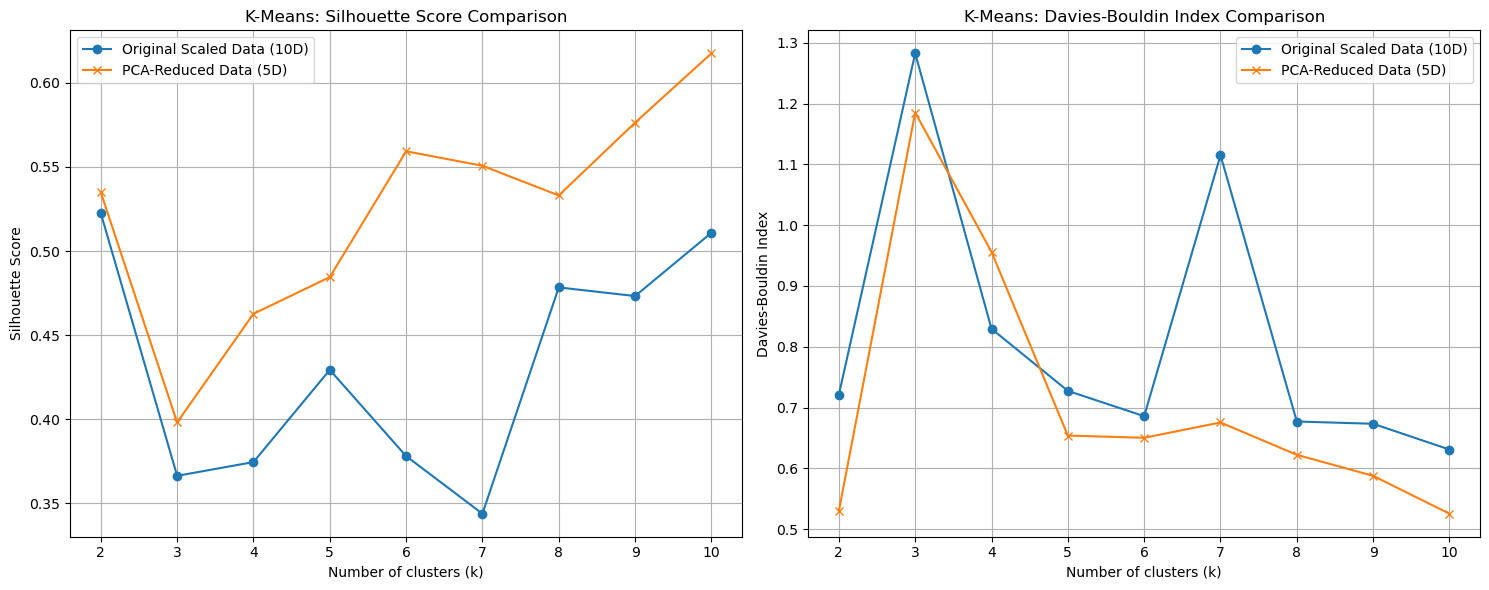


Discussion on Impact of PCA on Clustering:
1. Performance Metrics: Compare the Silhouette scores (higher is better) and Davies-Bouldin indices (lower is better) for clustering on original vs. PCA-reduced data.
   - If PCA-reduced data yields better scores, it suggests PCA removed noise or redundant information, leading to more distinct clusters.
   - If scores are worse, PCA might have discarded information crucial for cluster separation.
   - Sometimes, the optimal 'k' might also shift.
2. Computational Speed: Clustering on lower-dimensional data is generally faster.
3. Interpretability: Clusters found in a lower-dimensional PCA space can sometimes be easier to interpret if the principal components themselves are interpretable (though this is not always the case).
For this dataset, observe the plots. If PCA (to 5D) helps, you'd see higher silhouette scores or lower Davies-Bouldin scores consistently.


In [5]:
##the Impact of Dimensionality Reduction on Clustering 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
try:
    df_raw = pd.read_csv('challenge.txt', sep='\t', header=None)
    df_raw.columns = [f'feature_{i}' for i in range(df_raw.shape[1])]
except FileNotFoundError:
    print("Error: 'challenge.txt' not found. Ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

# --- Data Preprocessing: Scaling ---
scaler = StandardScaler()
X_scaled_original = scaler.fit_transform(df_raw)

# --- PCA for Dimensionality Reduction ---
print("\n--- Applying PCA for Dimensionality Reduction ---")
# Option 1: Choose n_components to explain a certain variance (e.g., 95%)
# pca_var = PCA(n_components=0.95)
# X_pca_var = pca_var.fit_transform(X_scaled_original)
# print(f"PCA selected {pca_var.n_components_} components to explain 95% variance.")

# Option 2: Choose a fixed number of components (e.g., 3 or 5 for comparison)
n_pca_components = 5 # Let's try 5 components
pca_fixed = PCA(n_components=n_pca_components)
X_pca_fixed = pca_fixed.fit_transform(X_scaled_original)
print(f"PCA reduced data to {n_pca_components} components.")
print(f"Explained variance by {n_pca_components} components: {np.sum(pca_fixed.explained_variance_ratio_):.4f}")


# --- K-Means Clustering on Original Scaled Data (for baseline comparison) ---
print("\n--- K-Means Clustering on Original Scaled Data (10 dimensions) ---")
k_range = range(2, 11)
kmeans_orig_silhouette = []
kmeans_orig_davies = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled_original)
    if len(np.unique(labels)) > 1:
        silhouette = silhouette_score(X_scaled_original, labels)
        davies_bouldin = davies_bouldin_score(X_scaled_original, labels)
        kmeans_orig_silhouette.append(silhouette)
        kmeans_orig_davies.append(davies_bouldin)
        # print(f"Original K-Means (k={k}): Silhouette={silhouette:.3f}, Davies-Bouldin={davies_bouldin:.3f}")
    else:
        kmeans_orig_silhouette.append(np.nan)
        kmeans_orig_davies.append(np.nan)

# --- K-Means Clustering on PCA-Reduced Data ---
print(f"\n--- K-Means Clustering on PCA-Reduced Data ({n_pca_components} dimensions) ---")
kmeans_pca_silhouette = []
kmeans_pca_davies = []

for k in k_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels_pca = kmeans_pca.fit_predict(X_pca_fixed)
    if len(np.unique(labels_pca)) > 1:
        silhouette_pca = silhouette_score(X_pca_fixed, labels_pca)
        davies_bouldin_pca = davies_bouldin_score(X_pca_fixed, labels_pca)
        kmeans_pca_silhouette.append(silhouette_pca)
        kmeans_pca_davies.append(davies_bouldin_pca)
        print(f"PCA K-Means (k={k}): Silhouette={silhouette_pca:.3f}, Davies-Bouldin={davies_bouldin_pca:.3f}")
    else:
        kmeans_pca_silhouette.append(np.nan)
        kmeans_pca_davies.append(np.nan)
        print(f"PCA K-Means (k={k}): Not enough distinct clusters.")

# --- Comparison Plots ---
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, kmeans_orig_silhouette, marker='o', label='Original Scaled Data (10D)')
plt.plot(k_range, kmeans_pca_silhouette, marker='x', label=f'PCA-Reduced Data ({n_pca_components}D)')
plt.title('K-Means: Silhouette Score Comparison')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, kmeans_orig_davies, marker='o', label='Original Scaled Data (10D)')
plt.plot(k_range, kmeans_pca_davies, marker='x', label=f'PCA-Reduced Data ({n_pca_components}D)')
plt.title('K-Means: Davies-Bouldin Index Comparison')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nDiscussion on Impact of PCA on Clustering:")
print("1. Performance Metrics: Compare the Silhouette scores (higher is better) and Davies-Bouldin indices (lower is better) for clustering on original vs. PCA-reduced data.")
print("   - If PCA-reduced data yields better scores, it suggests PCA removed noise or redundant information, leading to more distinct clusters.")
print("   - If scores are worse, PCA might have discarded information crucial for cluster separation.")
print("   - Sometimes, the optimal 'k' might also shift.")
print("2. Computational Speed: Clustering on lower-dimensional data is generally faster.")
print("3. Interpretability: Clusters found in a lower-dimensional PCA space can sometimes be easier to interpret if the principal components themselves are interpretable (though this is not always the case).")
print(f"For this dataset, observe the plots. If PCA (to {n_pca_components}D) helps, you'd see higher silhouette scores or lower Davies-Bouldin scores consistently.")